# Samuel Tilahun
* **January 30 2026**
* **NOAA Climate Data (BWI Airport Station #4214805)**

## Project Overview:
This project uses the Pandas and Matplotlib libraries to analyze daily weather data from the Greater DC Metro Area. This project identifies temperature trends over time, seasonal patterns in precipitation and temperature, as well as frequency of extreme weather events over time

The analysis uses 3,653 days of observations from January 1, 2016 through December 31, 2025.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in the CSV file w/ data as well as turn dates from objects into datetime64
df = pd.read_csv("(Local Weather Patterns)/4214805.csv",parse_dates=["DATE"])

In [3]:
# Create New Columns for Future Calculations
df["TAVG"] = (df["TMIN"]+df["TMAX"])/2
df["year"] = df["DATE"].dt.year
df['month'] = df["DATE"].dt.month

* **Question 1: How Have Temperatures Changed Over Time?**


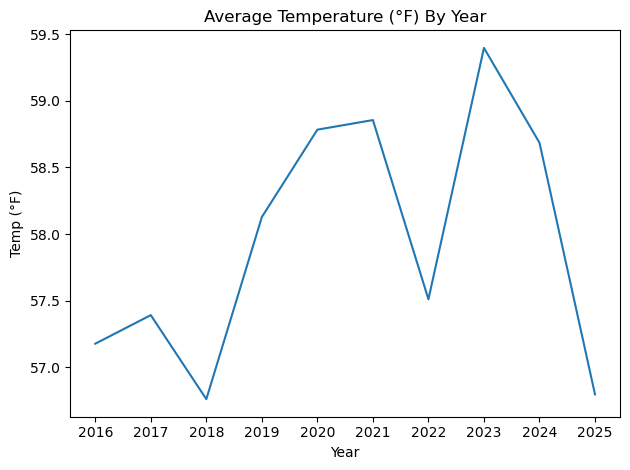

In [4]:
# Yearly Temperature Patterns (2016-2025)
df.groupby("year")["TAVG"].mean().plot()
plt.xticks(range(2016,2026))
plt.title("Average Temperature (°F) By Year")
plt.xlabel("Year")
plt.ylabel("Temp (°F)")
plt.tight_layout()

* **Question 2: What Are the Monthly Patterns in Precipitation and Temperature?**
* ***Part A: Monthly Temperature Chart***

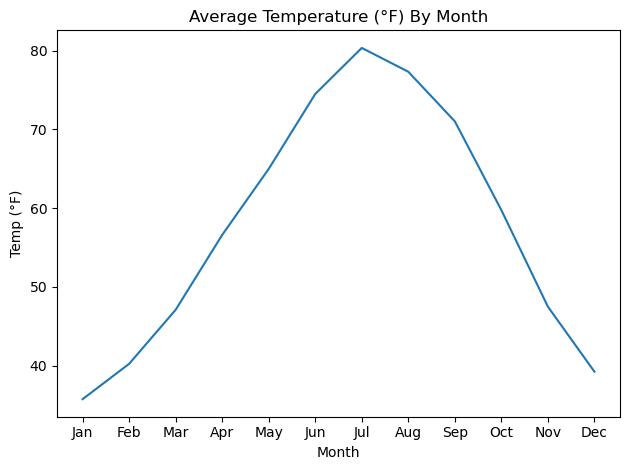

In [5]:
#Monthly Temperature Patterns (2016-2025)
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.groupby("month")["TAVG"].mean().plot()
plt.xticks(range(1,13),month_names)
plt.xlabel("Month")
plt.ylabel("Temp (°F)")
plt.title("Average Temperature (°F) By Month")
plt.tight_layout()

* ***Part B: Monthly Precipitation Chart***

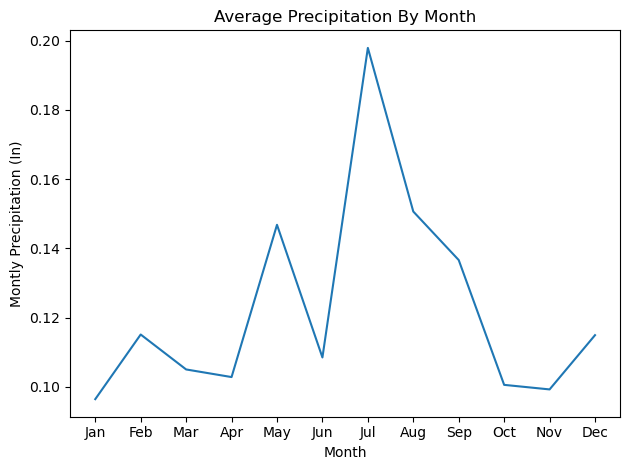

In [6]:
# Monthly Precipitation Patterns (2016-2025)
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.groupby('month')['PRCP'].mean().plot()
plt.xticks(range(1,13),month_names)
plt.xlabel("Month")
plt.ylabel("Montly Precipitation (In)")
plt.title("Average Precipitation By Month")
plt.tight_layout()

* **Question 3: How Frequent Are Extreme Weather Events?**

<Figure size 1000x400 with 0 Axes>

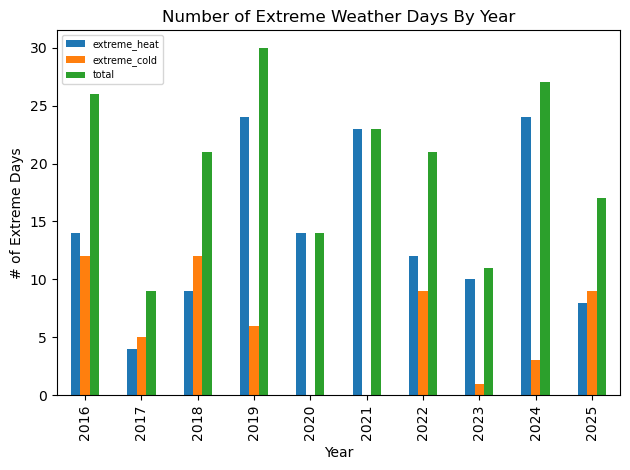

In [7]:
# Number of Extreme Weather Days by Year
df['extreme_heat'] = df['TMAX']>=95
df['extreme_cold']=df['TMIN']<=15
df['total'] = (df['TMAX']>=95) | (df['TMIN']<=15)
xtremes = df.groupby("year")[['extreme_heat','extreme_cold','total']].sum()
plt.figure(figsize=(10,4))
xtremes.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("# of Extreme Days")
plt.title("Number of Extreme Weather Days By Year")
plt.tight_layout()
plt.legend(loc="best",fontsize='x-small')